# Digit Recognizer
***

## Importing Libraries

In [56]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
#from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings

warnings.filterwarnings('ignore')

## Load Dataset and test

In [3]:
dataset = pd.read_csv("train.csv")
dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test= pd.read_csv("test.csv")
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
dataset.isnull().sum().describe()

count    785.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

## Visulization

Text(0.5, 1.0, 'Number of digit classes')

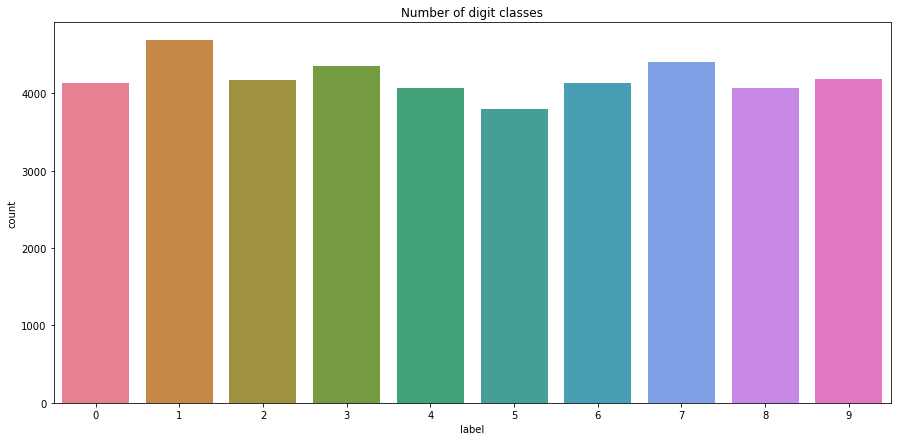

In [8]:
plt.figure(figsize=(15,7))
g = sns.countplot(dataset.label, palette="husl")
plt.title("Number of digit classes")

In [9]:
dataset.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

## Split to X,y

In [22]:
X = dataset.drop(labels = ["label"],axis = 1) 
y = dataset["label"] 

In [23]:
X.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


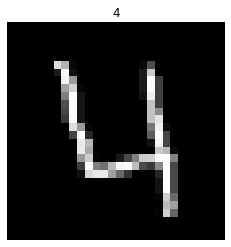

In [24]:
# plot some samples
img = X.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(dataset.iloc[3,0])
plt.axis("off")
plt.show()

In [25]:
np.max(X)

pixel0       0
pixel1       0
pixel2       0
pixel3       0
pixel4       0
            ..
pixel779    62
pixel780     0
pixel781     0
pixel782     0
pixel783     0
Length: 784, dtype: int64

## Normalize

In [14]:
X = X / 255.0
test = test / 255.0

In [15]:
print("x_train shape: ",X.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


## Reshape

In [16]:
X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


Label Encoding

In [17]:
y = to_categorical(y, num_classes = 10)

## Train and Test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2)

In [19]:
print("x_train shape",X_train.shape)
print("y_test shape",y_test.shape)

x_train shape (37800, 28, 28, 1)
y_test shape (4200, 10)


In [20]:
print("x_test shape",X_test.shape)
print("y_test shape",y_test.shape)

x_test shape (4200, 28, 28, 1)
y_test shape (4200, 10)


## CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size = 32, epochs=10, validation_split=0.2)

## Test Prediction

In [ ]:
pred = model.predict(test)

In [ ]:
predictions_test = []

for i in pred:
    predictions_test.append(np.argmax(i))

In [ ]:
test_copy= pd.read_csv("/test.csv")
submission =  pd.DataFrame({
        "ImageId": test_copy.index+1,
        "Label": predictions_test
    })

submission

In [ ]:
submission.to_csv('my_submission.csv', index=False)

## PCA and Classification

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(42000, 784)

In [34]:
#cov_matrix = np.matmul(X_scaled.T, X_scaled)
#cov_matrix.shape

(784, 784)

In [35]:
from scipy.linalg import eigh

#lambdas, vectors = eigh(cov_matrix, eigvals=(782, 783))
#vectors.shape

(784, 2)

In [36]:
#vectors = vectors.T
#vectors.shape

(2, 784)

In [38]:
#new_coordinates = np.matmul(vectors, X_scaled.T)
#print(new_coordinates.shape)
#new_coordinates = np.vstack((new_coordinates, y)).T

(2, 42000)


In [84]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.n_components = 150
pca_data = pca.fit_transform(X_scaled)
pca_data.shape
pca_data

array([[ -5.14047778,  -5.226445  ,   3.88700197, ...,  -0.69706925,
          0.29883568,  -0.12134217],
       [ 19.29233216,   6.0329958 ,   1.30814737, ...,  -0.29369648,
         -0.43340444,   0.41975491],
       [ -7.64450334,  -1.70581297,   2.28932665, ...,  -0.09025512,
         -0.27554876,  -0.03773447],
       ...,
       [  0.49539169,   7.07627665, -12.08969886, ...,   0.20485155,
         -0.73331261,   0.94881518],
       [  2.30723991,  -4.34451145,   0.69984554, ...,  -0.03016768,
         -0.41259885,   0.70206079],
       [ -4.80767031,   1.55912073,  -2.49793615, ...,  -0.02185765,
         -1.70843034,  -0.35437327]])

In [85]:
pca_data_label = np.vstack((pca_data.T, y)).T
pca_data_label

array([[ -5.14047778,  -5.226445  ,   3.88700197, ...,   0.29883568,
         -0.12134217,   1.        ],
       [ 19.29233216,   6.0329958 ,   1.30814737, ...,  -0.43340444,
          0.41975491,   0.        ],
       [ -7.64450334,  -1.70581297,   2.28932665, ...,  -0.27554876,
         -0.03773447,   1.        ],
       ...,
       [  0.49539169,   7.07627665, -12.08969886, ...,  -0.73331261,
          0.94881518,   7.        ],
       [  2.30723991,  -4.34451145,   0.69984554, ...,  -0.41259885,
          0.70206079,   6.        ],
       [ -4.80767031,   1.55912073,  -2.49793615, ...,  -1.70843034,
         -0.35437327,   9.        ]])

In [86]:
df_PCA = pd.DataFrame(new_coordinates, columns=["f1", "f2", "labels"])
df_PCA.head()

,f1,f2,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


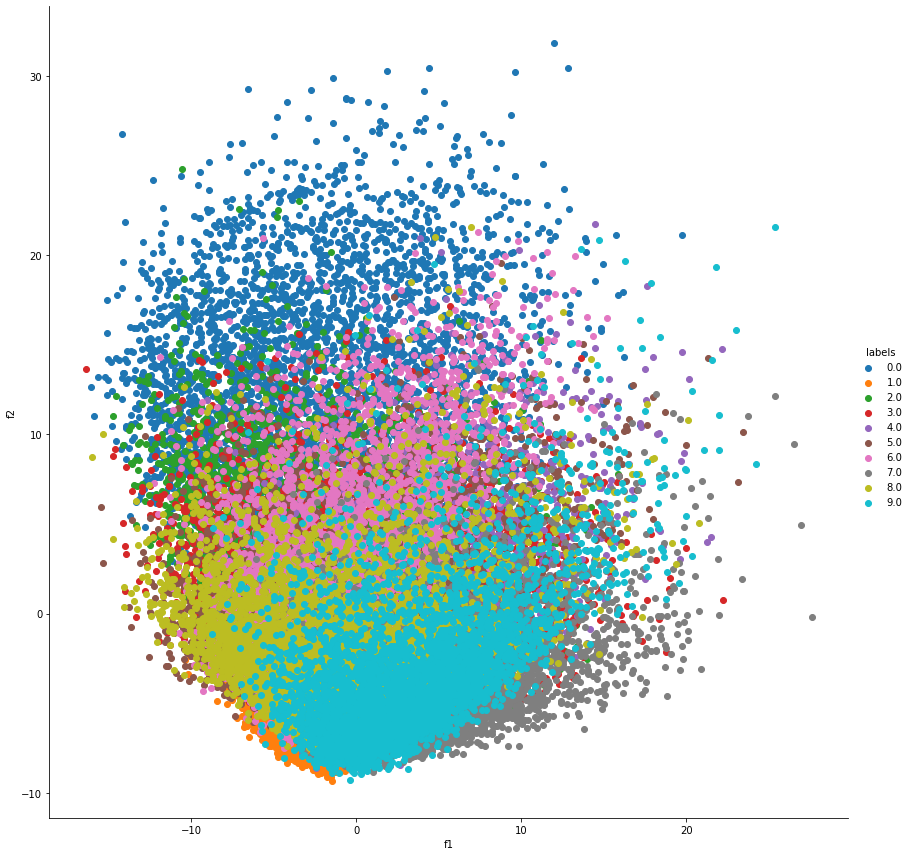

In [87]:
sns.FacetGrid(df_PCA, hue="labels", size=12).map(plt.scatter, "f1", "f2").add_legend()
plt.show()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.3, random_state=42)

In [89]:
models={
        'LogisticRegression':LogisticRegression(),
        'KNeighborsClassifier':KNeighborsClassifier(),
        'DecisionTreeClassifier':DecisionTreeClassifier(),
        'GaussianNB':GaussianNB(),
        'RandomForestClassifier':RandomForestClassifier()
        }

In [90]:
scores = {}

In [91]:
for i, model in models.items():
    print("model: ", model)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test , y_pred))
    print("-" * 50)
    scores[i] = model.score(X_test,y_test)

model:  LogisticRegression()
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1200
           1       0.96      0.97      0.97      1389
           2       0.92      0.90      0.91      1294
           3       0.90      0.87      0.89      1355
           4       0.91      0.94      0.92      1222
           5       0.86      0.87      0.86      1085
           6       0.95      0.96      0.95      1256
           7       0.93      0.91      0.92      1359
           8       0.89      0.89      0.89      1209
           9       0.90      0.90      0.90      1231

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600

--------------------------------------------------
model:  KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1200
           1       0.

### <font color = 'blue'>SVM: </font>

In [92]:
kernels = {'SVC_linear':'linear','SVC_poly':'poly','SVC_rbf':'rbf','SVC_sigmoid':'sigmoid'}

In [93]:
svc = {}

In [94]:
def SVM_fit_score(kernels,  X_train, X_test, y_train, y_test):

    for i, kernel in kernels.items():
        
        print('kernel: ', kernel)
        
        svc[i] = SVC(kernel=kernel).fit(X_train, y_train)
        y_pred = svc[i].predict(X_test)
        
        print(classification_report(y_test , y_pred))
        print('-'*60)
        scores[i] = svc[i].score(X_test,y_test)
        

In [95]:
SVM_fit_score(kernels, X_train, X_test, y_train, y_test)

kernel:  linear
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1200
           1       0.97      0.98      0.97      1389
           2       0.90      0.93      0.92      1294
           3       0.90      0.91      0.91      1355
           4       0.92      0.95      0.93      1222
           5       0.90      0.89      0.90      1085
           6       0.96      0.94      0.95      1256
           7       0.95      0.92      0.93      1359
           8       0.94      0.92      0.93      1209
           9       0.93      0.91      0.92      1231

    accuracy                           0.93     12600
   macro avg       0.93      0.93      0.93     12600
weighted avg       0.93      0.93      0.93     12600

------------------------------------------------------------
kernel:  poly
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1200
           1       0.98      0.98      0.

In [96]:
scores = pd.DataFrame(scores, index=['Score']).transpose()

In [97]:
scores.sort_values(by = ['Score'], ascending = False, inplace = True)

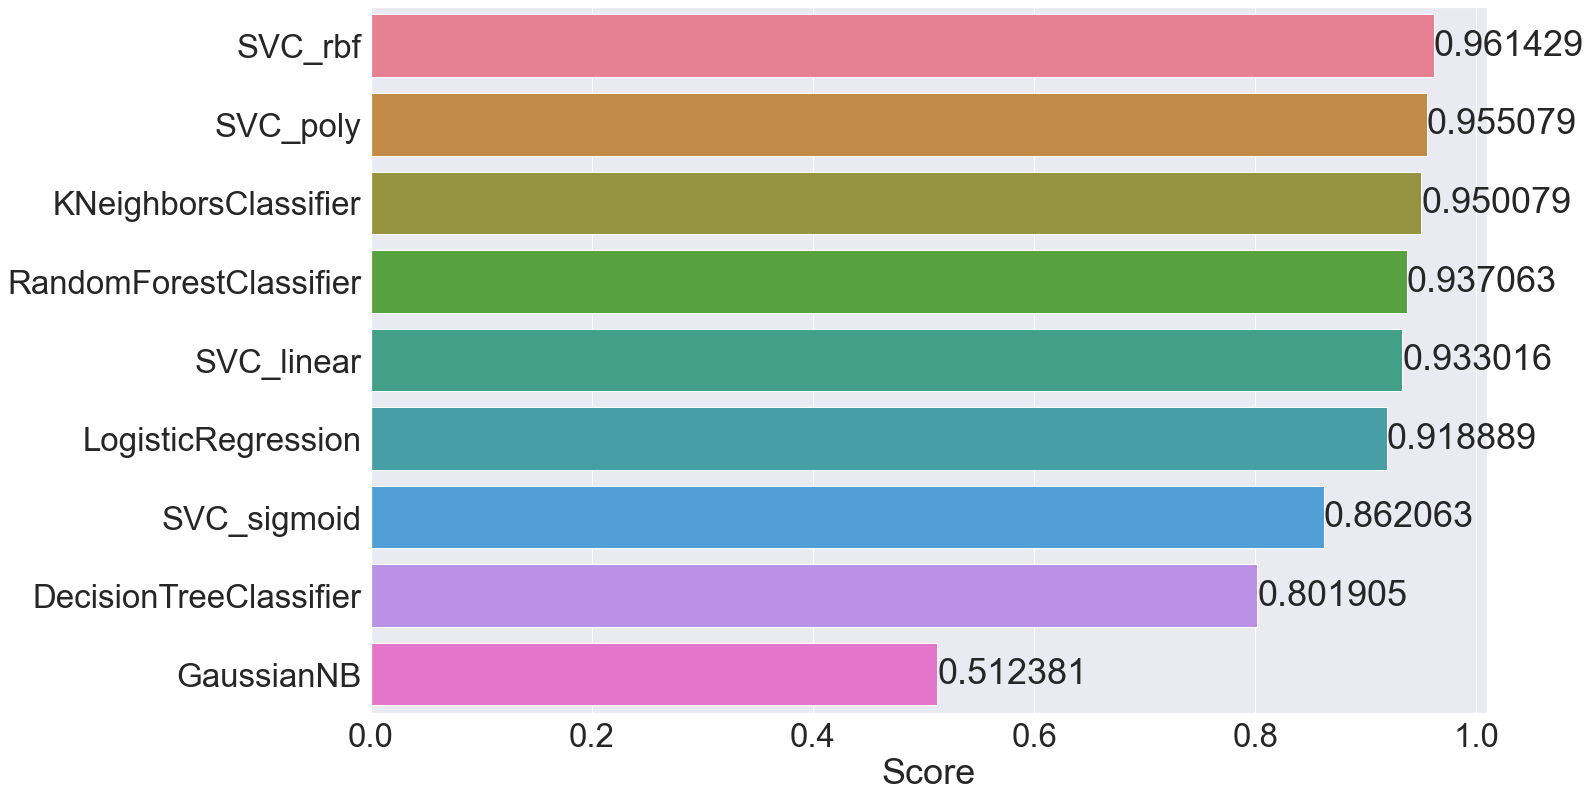

In [98]:
plt.figure(figsize = (20,13))
sns.set(font_scale = 3)
s = sns.barplot(x=scores.Score, y = scores.index, data = scores, palette="husl")
s.bar_label(s.containers[0]);